In [1]:
import sys
sys.path.append('../')

## Perceptrón

El **algoritmo del Perceptrón** es un modelo de clasificación supervisado que se utiliza para problemas linealmente separables. A continuación, se detallan los pasos principales del algoritmo:

1. **Inicialización**: Se inicializa el vector de pesos $\mathbf{w}$ con ceros o con pequeños valores aleatorios.
2. **Actualización de pesos**: Para cada muestra de entrenamiento $\mathbf{x}^{(i)}$:
   - Se calcula la salida predicha $\hat{y}^{(i)}$ utilizando la función de activación $\phi$.
   - Se actualizan los pesos en función del error entre la salida predicha y la etiqueta real.

### Cálculo de la salida predicha
La salida predicha $\hat{y}$ se determina utilizando una función de activación escalón unitario, evaluada en el valor de entrada ponderado $z$. El valor de $z$ se calcula como el producto punto entre el vector de pesos y el vector de entrada:

$$z = \mathbf{w}^T \mathbf{x}$$

La función escalón unitario $\phi(z)$ clasifica la entrada según el signo de $z$:

$$\phi(z) = 
\begin{cases}
1 & \text{si } z \geq 0, \\
-1 & \text{si } z < 0.
\end{cases}$$

### Actualización del vector de pesos
El vector de pesos $\mathbf{w}$ se ajusta después de cada muestra de entrenamiento en función del error entre la etiqueta real $y^{(i)}$ y la salida predicha $\hat{y}^{(i)}$. La actualización sigue la regla de aprendizaje:

$$\mathbf{w} := \mathbf{w} + \Delta\mathbf{w}$$

donde
$$\Delta\mathbf{w}=\eta \left( y^{(i)} - \hat{y}^{(i)} \right) \mathbf{x}^{(i)}$$
- $\eta$ es la tasa de aprendizaje ($0<\eta\leq 1$),
- $y^{(i)}$ es la etiqueta verdadera de la muestra $\mathbf{x}^{(i)}$,
- $\hat{y}^{(i)}$ es la salida predicha para la muestra $\mathbf{x}^{(i)}$.

Este proceso se repite para cada muestra hasta que el modelo clasifique correctamente todas las muestras o hasta que se alcance un número máximo de iteraciones.

Si volviésemos a evaluar la misma muestra después de actualizar los pesos obtendríamos:
$$z'=\left[\mathbf{w} + \eta \left( y^{(i)} - \hat{y}^{(i)} \right) \mathbf{x}^{(i)}\right]^T\mathbf{x}^{(i)}=z+\eta \left( y^{(i)} - \hat{y}^{(i)} \right)\left\|\mathbf{x}^{(i)}\right\|^2$$
por lo  que:
- Si $y^{(i)}=1$ y $\hat{y}^{(i)}=-1$ entonces $z'>z$. El valor de $z$ aumenta debido a la corrección positiva de los pesos.
- Si $y^{(i)}=-1$ y $\hat{y}^{(i)}=1$ entonces $z'<z$. El valor de $z$ disminuye debido a la corrección negativa de los pesos.
- Si $y^{(i)}=\hat{y}^{(i)}$, entonces $z'=z$. No hay cambio, ya que la predicción fue correcta.

### Comentarios sobre el algoritmo
- **Convergencia**: Si los datos son **linealmente separables**, el algoritmo del Perceptrón garantiza la convergencia, es decir, encontrará un conjunto de pesos que separa las dos clases. Si los datos no son linealmente separables, el algoritmo no convergerá y continuará ajustando los pesos indefinidamente.
  
- **Tasa de aprendizaje**: La tasa de aprendizaje $\eta$ controla el tamaño del ajuste en cada actualización de los pesos. Es importante elegir un valor adecuado de $\eta$ para evitar oscilaciones (si es muy alto) o un aprendizaje demasiado lento (si es muy bajo).

- **Simplicidad y limitaciones**: Aunque el Perceptrón es simple y eficiente, su capacidad de clasificación está limitada a problemas linealmente separables. Para casos más complejos, se pueden utilizar versiones extendidas como el **Perceptrón Multicapa** o algoritmos de redes neuronales más sofisticados.

### Implementación del algoritmo

In [2]:
import numpy as np

class Perceptron:
    """
    Perceptrón para clasificación binaria.

    Parámetros:
    -----------
    eta : float
        Tasa de aprendizaje (entre 0.0 y 1.0)
    n_iter : int
        Número de iteraciones (épocas) sobre el conjunto de entrenamiento.
    random_state : int
        Semilla para la inicialización aleatoria de los pesos.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Ajusta los pesos en función del conjunto de entrenamiento."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

    def net_input(self, X):
        """Calcula el input neto z."""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Devuelve las etiquetas predichas."""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Entrenar un modelo perceptrón en conjunto de datos Iris

In [3]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Seleccionar setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)

In [7]:
# Extraer longitud de sépalo y longitud de pétalo
X = df.iloc[0:100, [0, 2]].values

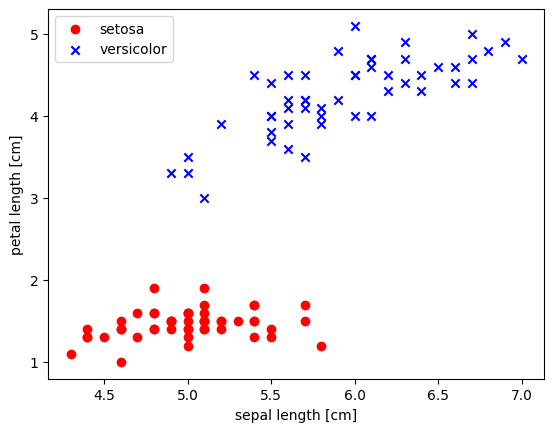

In [8]:
# Representar los datos
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

El diagrama de dispersión anterior muestra la distribución de las muestras de flor en el conjunto de datos Iris sobre los dos ejes de características, longitud del pétalo y longitud del sépalo. En este subespacio de características bidimensional, podemos ver que un límite de decisión lineal puede ser suficiente para separar flores Setosa de flores Versicolor. Por tanto, un clasificador lineal como el perceptrón podría ser capaz de clasificar las flores en este conjunto de datos perfectamente.

In [9]:
# Entrenar el modelo
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

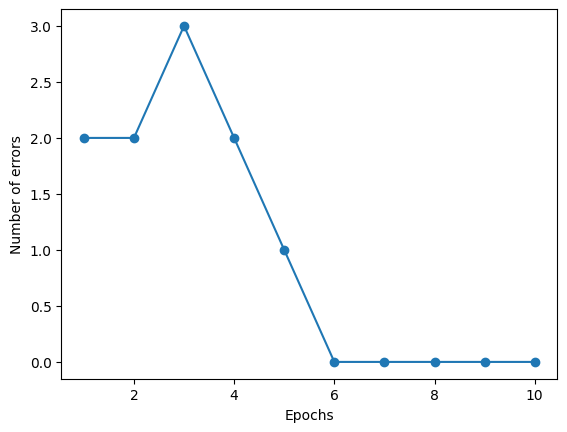

In [10]:
# Mostrar errores por cada época
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

Como podemos ver en la gráfica anterior, nuestro perceptrón ha convergido después de seis épocas y debería ser capaz de clasificar perfectamente las muestras de entrenamiento.

In [11]:
from utils.plot import plot_decision_regions

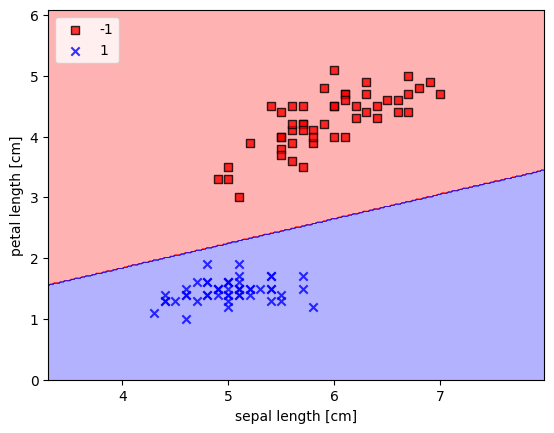

In [12]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()